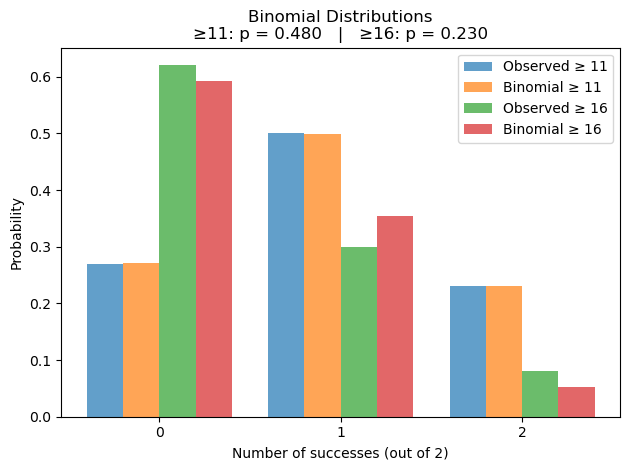

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import comb

# -----------------------------
# Load and clean data
# -----------------------------
df = pd.read_csv(
    "PH336 lab4 dice.csv",
    header=1,
    usecols=["Trans. D20:", "Space"],
    nrows=100
)

df.rename(columns={"Trans. D20:": "A", "Space": "B"}, inplace=True)

# -----------------------------
# Combine A and B into single Bernoulli lists
# -----------------------------
list50 = []  # success ≥ 11
list75 = []  # success ≥ 16

for a, b in zip(df["A"], df["B"]):
    list50.append(1 if a >= 11 else 0)
    list50.append(1 if b >= 11 else 0)

    list75.append(1 if a >= 16 else 0)
    list75.append(1 if b >= 16 else 0)

# -----------------------------
# Binomial distribution function
# -----------------------------
def binomial_distribution(data, n=2):
    p = np.mean(data)

    binom_probs = [
        comb(n, k) * p**k * (1 - p)**(n - k)
        for k in range(n + 1)
    ]

    pairs = np.array(data).reshape(-1, n)
    successes = pairs.sum(axis=1)

    obs_probs = [
        np.mean(successes == k)
        for k in range(n + 1)
    ]

    return binom_probs, obs_probs, p

# -----------------------------
# Compute distributions
# -----------------------------
binom50, obs50, p50 = binomial_distribution(list50)
binom75, obs75, p75 = binomial_distribution(list75)

# -----------------------------
# Plot both thresholds
# -----------------------------
x = np.arange(3)
width = 0.2

plt.bar(x - width, obs50, width=width, label="Observed ≥ 11", alpha=0.7)
plt.bar(x, binom50, width=width, label="Binomial ≥ 11", alpha=0.7)

plt.bar(x + width, obs75, width=width, label="Observed ≥ 16", alpha=0.7)
plt.bar(x + 2*width, binom75, width=width, label="Binomial ≥ 16", alpha=0.7)

plt.xticks(x + width / 2, [0, 1, 2])
plt.xlabel("Number of successes (out of 2)")
plt.ylabel("Probability")
plt.title(
    f"Binomial Distributions\n"
    f"≥11: p = {p50:.3f}   |   ≥16: p = {p75:.3f}"
)
plt.legend()
plt.tight_layout()
plt.show()
